<a href="https://colab.research.google.com/github/SyedHuzaifa007/PIAIC-Deep-Learning-Assignments/blob/main/Flowers_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [26]:
# Importing Modules 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
import cv2
import os
import tensorflow as tf
import tensorflow_datasets as tfds
from pathlib import Path
from skimage import io
from skimage.transform import resize
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [18]:
# Loading the data

path = Path('/content/drive/MyDrive/flowers')

# Prepairing Input and Output

flowers = []
features = []
labels = []
for dir in path.iterdir():
  flowers.append(dir.name)
  print(dir.name)
  for img_path in dir.iterdir():
    if img_path.name.endswith("jpg"):
      labels.append(dir.name)
      img_arr = cv2.imread(str(img_path), cv2.IMREAD_COLOR)

# Resizing Images

      img_arr = cv2.resize(img_arr, (150,150))
      features.append(img_arr)

sunflower
daisy
dandelion
tulip
rose
.ipynb_checkpoints


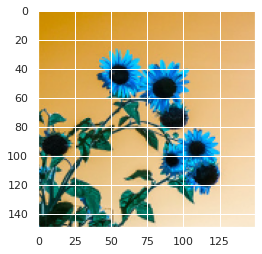

In [22]:
# plotting Features

plt.imshow(features[20])
plt.show()

In [23]:
# Converting Labels and Features into Arrays

features = np.array(features)
labels = np.array(labels)

In [24]:
features

array([[[[ 11, 125, 126],
         [  9, 120, 133],
         [ 10, 116, 137],
         ...,
         [ 43, 148, 144],
         [ 43, 133, 129],
         [  9,  33,  34]],

        [[  9, 122, 126],
         [ 22,  60, 169],
         [ 27,  40, 207],
         ...,
         [234, 242, 245],
         [157, 184, 183],
         [ 12,  16,  18]],

        [[ 10, 122, 130],
         [ 33,  66, 173],
         [ 25,  39, 184],
         ...,
         [206, 210, 208],
         [159, 187, 183],
         [  4,  18,  17]],

        ...,

        [[ 10, 129, 126],
         [ 27,  51,  48],
         [ 29,  19,   8],
         ...,
         [ 27,  15,  10],
         [ 30,  47,  41],
         [  5,  21,  19]],

        [[ 18, 122, 121],
         [ 34,  54,  53],
         [ 28,  16,  12],
         ...,
         [ 12,  10,   9],
         [ 23,  42,  39],
         [ 12,  18,  18]],

        [[ 23,  93,  95],
         [ 14,  35,  35],
         [ 11,  31,  25],
         ...,
         [  9,  29,  33],
        

In [25]:
labels

array(['sunflower', 'sunflower', 'sunflower', ..., 'rose', 'rose', 'rose'],
      dtype='<U9')

In [28]:
# Normalizing Features

features = features.reshape(len(features), 150,150,3)/255

In [31]:
# One Hot Encoding Labels

labels = LabelBinarizer
labels = to_categorical(labels)

TypeError: ignored